In [1]:
import jax.numpy as jnp
import numpy as np
import time
import chex
import jax
import gymnasium as gym
import exciting_environments as excenv
import random
import matplotlib.pyplot as plt

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Comparison Gym and ExcEnv:

In [2]:
BATCH_SIZE=40
env=excenv.make('CartPole-v0',batch_size=BATCH_SIZE)
env_gym= gym.vector.make("CartPole-v1",num_envs=BATCH_SIZE)

In [3]:
data_batch_jax = jnp.zeros(10000)
data_batch_gym = np.zeros(10000)
act=[env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(len(data_batch_jax))]
act_gym=[env_gym.action_space.sample() for _ in range(len(data_batch_gym))]
# init_gym=env_gym.reset(seed=9)
# env.reset(initial_values=init_gym[0])


In [7]:
env.reset(random_key=jax.random.PRNGKey(9))
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env.step(act[i])
    #data_batch1[i]=(np.array(obs)[1,0]*np.pi)
ex_time= time.time() -start_t
print(f"Jax Computation Time: {ex_time} \n")

Jax Computation Time: 0.10309410095214844 



In [4]:

env.reset(random_key=jax.random.PRNGKey(9))
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env.step(act[i])
    #data_batch1[i]=(np.array(obs)[1,0]*np.pi)
ex_time= time.time() -start_t
print(f"Jax Computation Time: {ex_time} \n")

env_gym.reset(seed=9)
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env_gym.step(act_gym[i])
    #data_batch1=jnp.append(data_batch1,obs[0][0]).block_until_ready()
    #data_batch1[i]=(np.array(obs)[1,0]*np.pi)
ex_time= time.time() -start_t
print(f"Gym Computation Time: {ex_time}")

Jax Computation Time: 0.17115545272827148 

Gym Computation Time: 0.904822587966919


In [5]:
env.reset(random_key=jax.random.PRNGKey(9))
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env.step(act[i])
    #data_batch1[i]=(np.array(obs)[1,0]*np.pi)
ex_time= time.time() -start_t
print(f"Jax Computation Time: {ex_time} \n")

env_gym.reset(seed=9)
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env_gym.step(act_gym[i])
    #data_batch1=jnp.append(data_batch1,obs[0][0]).block_until_ready()
    #data_batch1[i]=(np.array(obs)[1,0]*np.pi)
ex_time= time.time() -start_t
print(f"Gym Computation Time: {ex_time}")

Jax Computation Time: 0.1831662654876709 

Gym Computation Time: 0.8958156108856201


## Comparison Simulation Results:

In [54]:
BATCH_SIZE=2
EPISODE_LENGTH=10000
env=excenv.make('Pendulum-v0',batch_size=BATCH_SIZE,max_torque=1,g=9.81*3/2,m=1/3,l=1,constraints=[1],tau=0.05)
env_gym= gym.vector.make("Pendulum-v1",num_envs=BATCH_SIZE,g=9.81)

act=[env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(EPISODE_LENGTH)]
act2=np.array(act)
#act_gym=[env_gym.action_space.sample() for _ in range(len(data_batch_gym))]
init_gym=env_gym.reset(seed=0)
print(init_gym)
init_jax=np.append(np.arctan(init_gym[0][:,1]/init_gym[0][:,0]).reshape(-1,1)/np.pi,init_gym[0][:,-1].reshape(-1,1),axis=1)
env.reset(initial_values=init_jax)

(array([[ 0.6520163 ,  0.758205  , -0.46042657],
       [ 0.9972427 ,  0.07420918,  0.90092736]], dtype=float32), {})


(array([[ 0.27392337, -0.46042657],
        [ 0.02364325,  0.90092736]], dtype=float32),
 {})

In [55]:
#env.reset(random_key=jax.random.PRNGKey(9))
data_batch_jax_x=[]
jax_v=[]
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env.step(act[i])
    #obs,reward,a,b,_ = env.step(act_jax)
    #data_batch_jax.at[i].set(np.array(obs)[1,0]*np.pi)
    data_batch_jax_x.append(np.cos(np.array(obs)[0,0]*np.pi))
    jax_v.append(np.array(obs)[0,1])
ex_time= time.time() -start_t
print(f"Jax Computation Time: {ex_time} \n")

#env_gym.reset(seed=9)
data_batch_gym_x=[]
data_batch_gym_x2=[]
gym_v=[]
gym_v2=[]
start_t = time.time()
for i in range(10000):
    #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
    obs,reward,a,b,_ = env_gym.step(act2[i])
    #obs,reward,a,b,_ = env_gym.step(act_gym)
    data_batch_gym_x.append(np.array(obs)[0,0])
    data_batch_gym_x2.append(np.array(obs)[1,0])
    gym_v.append(np.array(obs)[0,2])
    gym_v2.append(np.array(obs)[1,2])
ex_time= time.time() -start_t
print(f"Gym Computation Time: {ex_time}")

Jax Computation Time: 0.20818829536437988 

Gym Computation Time: 1.5383968353271484


In [56]:
jax_v[197:200]

[-0.03886866, -0.5665425, -1.1041543]

In [57]:
data_batch_jax_x[197:200]

[0.5170452634712341, 0.49259414065084467, 0.443823064769074]

In [47]:
gym_v[197:200]

[-1.6784993, -0.9845918, -0.96694475]

In [61]:
gym_v2[197:200]

[-0.39463103, -0.1814938, 0.8972989]

In [59]:
data_batch_gym_x[197:200]

[0.5170398, 0.49258605, -0.9670439]

In [62]:
data_batch_gym_x2[197:200]

[0.9633515, 0.965746, -0.61707073]

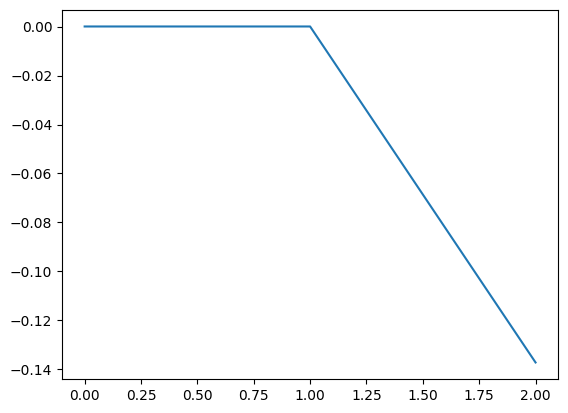

In [58]:
plt.plot(np.array(jax_v[197:200])-np.array(gym_v[197:200]))

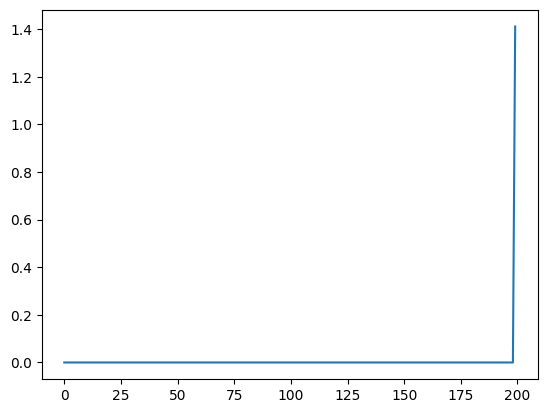

In [60]:
plt.plot(np.array(data_batch_jax_x[:200])-np.array(data_batch_gym_x[:200]))